***Importation des bibliotèques necessaires au projet***

In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

***Chargement de la dataset et aperçu des caractéristiques des données***

In [231]:
dataset = pd.read_csv('/content/kc_house_data.csv')
pd.set_option('display.max_rows', 10)
dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


***Description des colonnes de la base de données :***

1. **id** : Identifiant unique de la maison.
2. **date** : Date de la vente de la maison au format YYYYMMDDTHHMMSS.
3. **price** : Prix de vente de la maison.
4. **bedrooms** : Nombre de chambres à coucher.
5. **bathrooms** : Nombre de salles de bains.
6. **sqft_living** : Surface habitable intérieure en pieds carrés.
7. **sqft_lot** : Surface totale du terrain en pieds carrés.
8. **floors** : Nombre d'étages.
9. **waterfront** : Indicateur si la maison est en bord de mer (1 pour oui, 0 pour non).
10. **view** : Indicateur de la qualité de la vue (0 à 4).
11. **condition** : État général de la maison (1 à 5).
12. **grade** : Classification de la qualité de la construction et du design (1 à 13).
13. **sqft_above** : Surface habitable située au-dessus du sol en pieds carrés.
14. **sqft_basement** : Surface du sous-sol en pieds carrés.
15. **yr_built** : Année de construction de la maison.
16. **yr_renovated** : Année de la dernière rénovation de la maison (0 si jamais rénovée).
17. **zipcode** : Code postal de l'emplacement de la maison.
18. **lat** : Latitude de la maison.
19. **long** : Longitude de la maison.
20. **sqft_living15** : Surface habitable moyenne des 15 maisons voisines les plus proches, en pieds carrés.
21. **sqft_lot15** : Surface moyenne des terrains des 15 maisons voisines les plus proches, en pieds carrés.

In [232]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [233]:
dataset.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [234]:
dataset.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
                ..
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
Length: 21, dtype: int64

In [235]:
dataset.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
                  ...   
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
Length: 21, dtype: object

***Traitement de quelques colonnes de base de données***

In [236]:
dataset['bathrooms']=dataset['bathrooms'].astype(int)
dataset['floors']=dataset['floors'].astype(int)

In [237]:
def convert_to_datetime(x):
    return datetime.strptime(x,"%Y%m%dT%H%M%S")

dataset['date'] = dataset['date'].apply(convert_to_datetime)
dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2,1530,1131,3,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2,2310,5813,2,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0,1020,1350,2,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2,1600,2388,2,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [238]:
dataset['date'] = dataset['date'].astype(str)

In [239]:
def convert_to_year(x):
    return x.split('-')[0]

dataset['date'] = dataset['date'].apply(convert_to_year)
dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014,221900.0,3,1,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014,538000.0,3,2,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015,180000.0,2,1,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014,604000.0,4,3,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015,510000.0,3,2,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014,360000.0,3,2,1530,1131,3,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015,400000.0,4,2,2310,5813,2,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014,402101.0,2,0,1020,1350,2,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015,400000.0,3,2,1600,2388,2,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [240]:
dataset['date'] = dataset['date'].astype(int)

In [241]:
dataset.dtypes

id                 int64
date               int64
price            float64
bedrooms           int64
bathrooms          int64
                  ...   
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
Length: 21, dtype: object

In [242]:
dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014,221900.0,3,1,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014,538000.0,3,2,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015,180000.0,2,1,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014,604000.0,4,3,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015,510000.0,3,2,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014,360000.0,3,2,1530,1131,3,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015,400000.0,4,2,2310,5813,2,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014,402101.0,2,0,1020,1350,2,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015,400000.0,3,2,1600,2388,2,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


***Visualisation de la distribution des données***

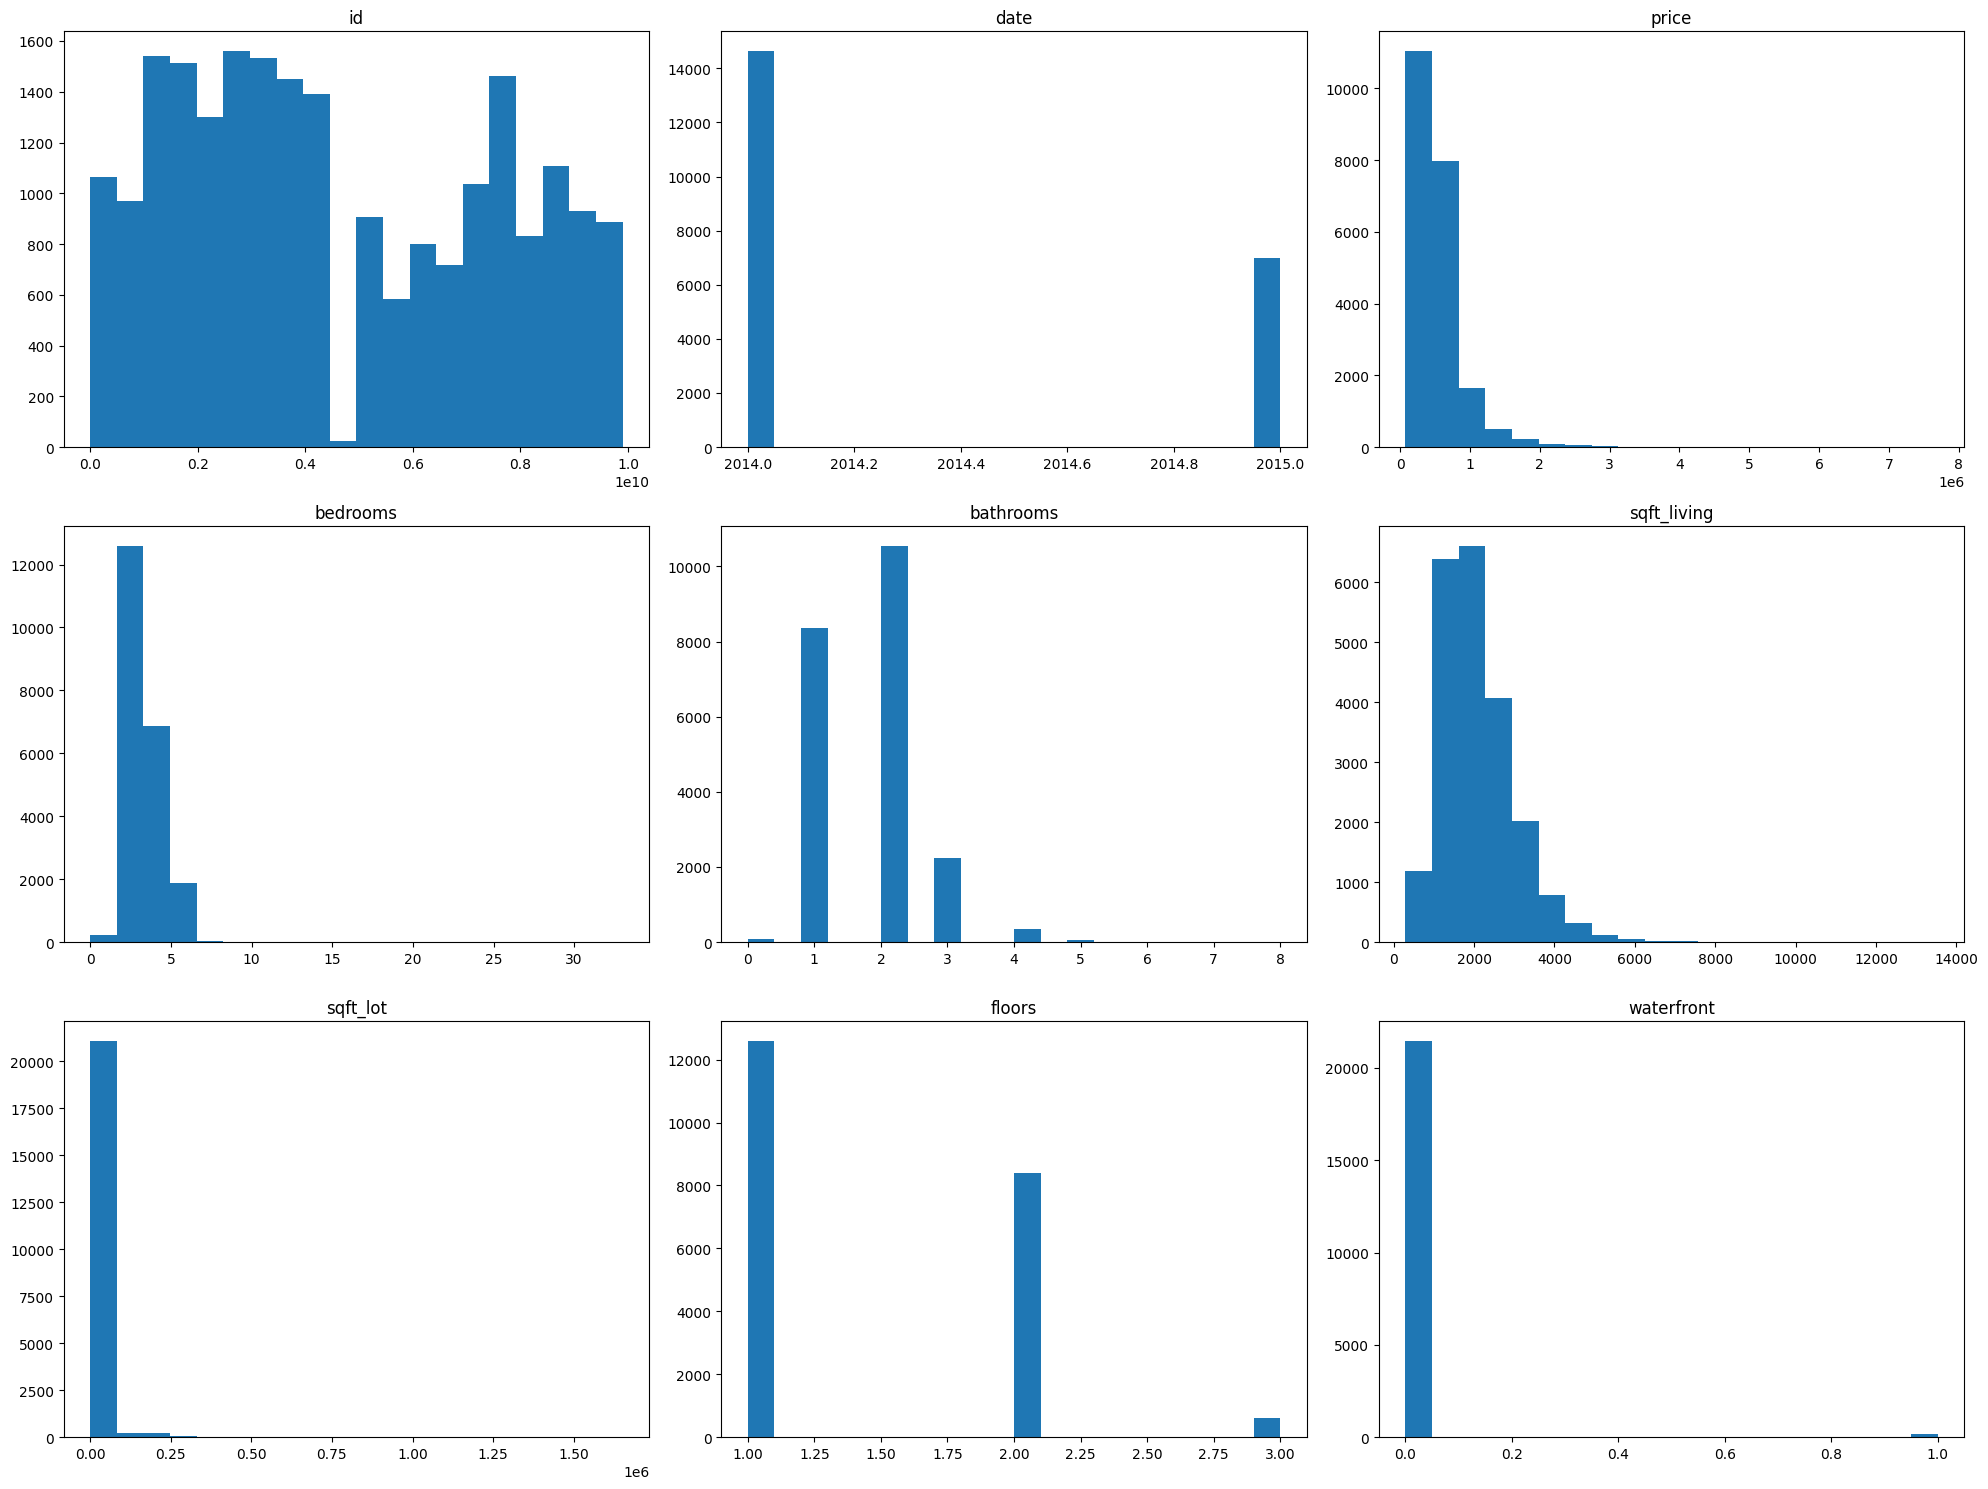

In [243]:
#Histogrammes pour voir la répartition des données
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))  # Adjust grid size
axs = axs.ravel()

for i, col in enumerate(dataset.columns):
    if i < len(axs):  # Check if enough subplots are available
        axs[i].hist(dataset[col], bins=20)
        axs[i].set_title(col)

plt.tight_layout()  # Improve spacing between subplots
plt.show()

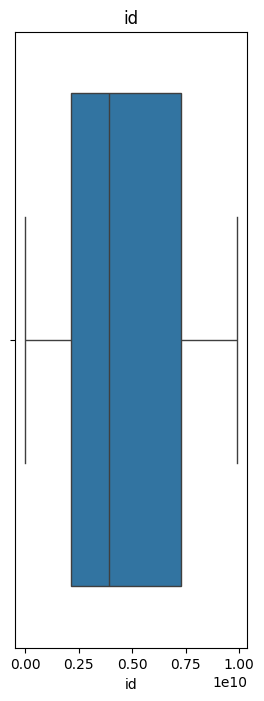

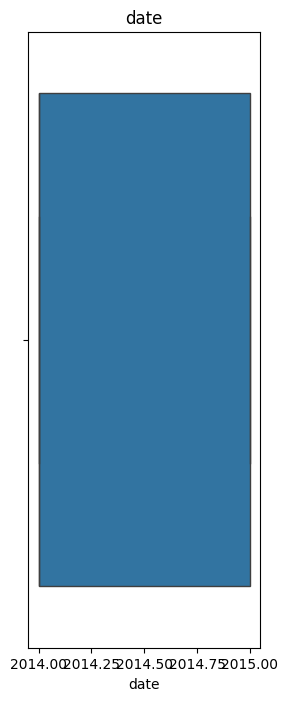

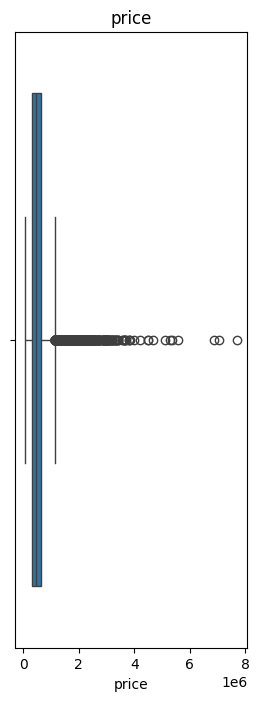

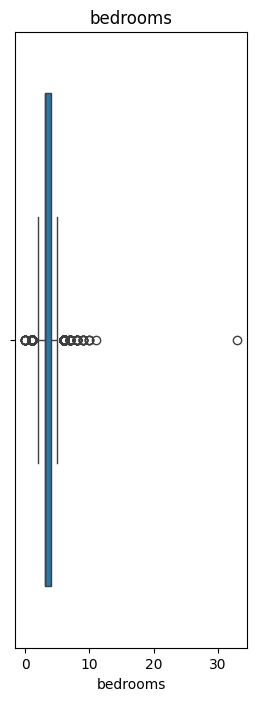

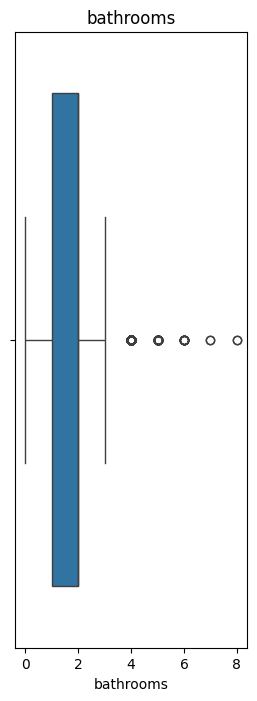

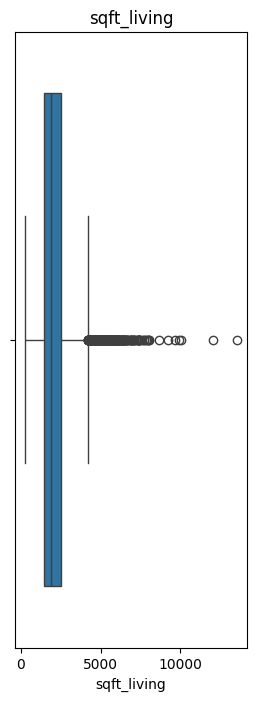

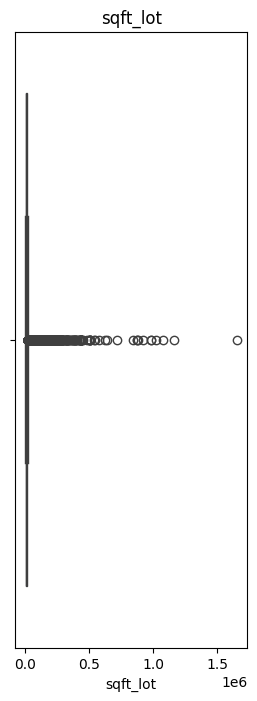

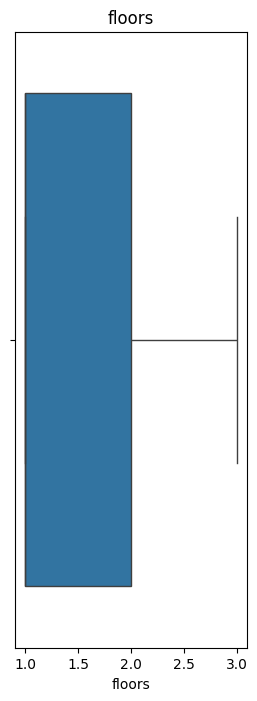

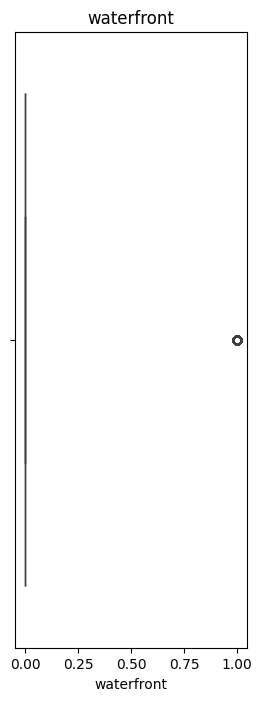

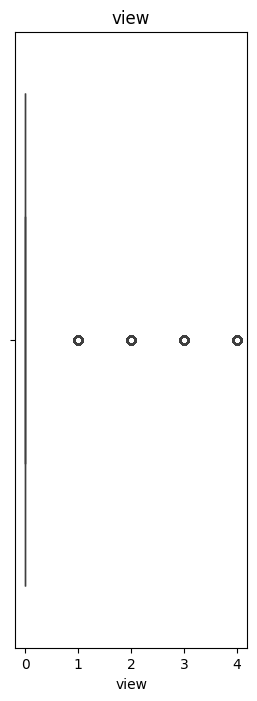

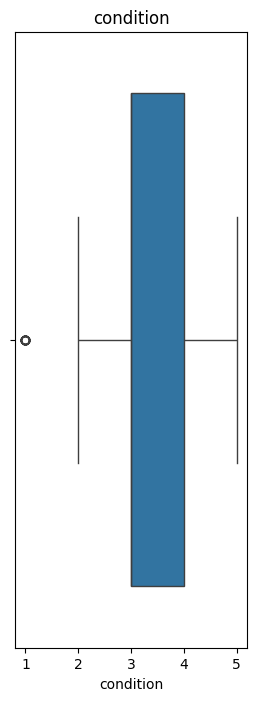

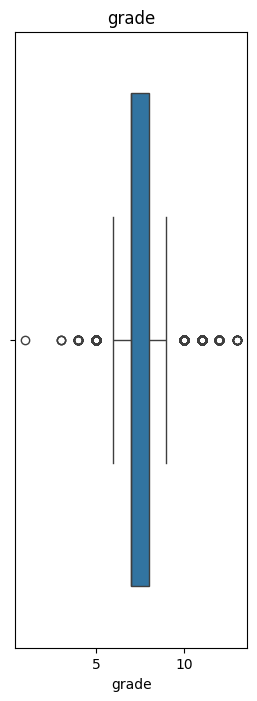

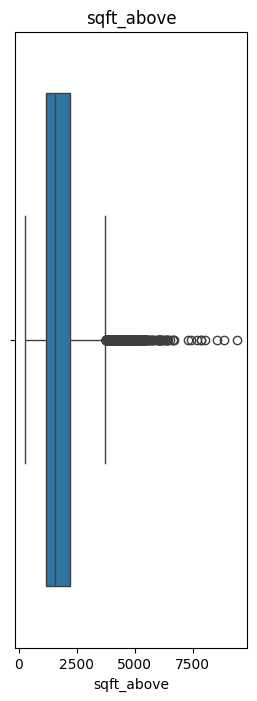

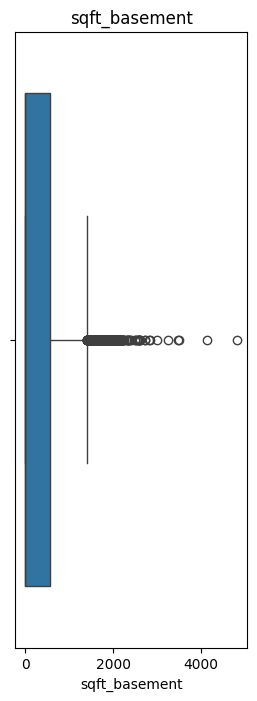

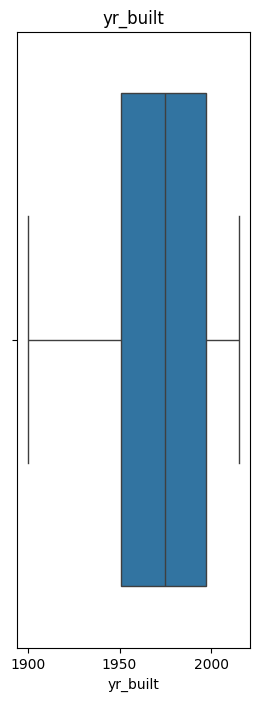

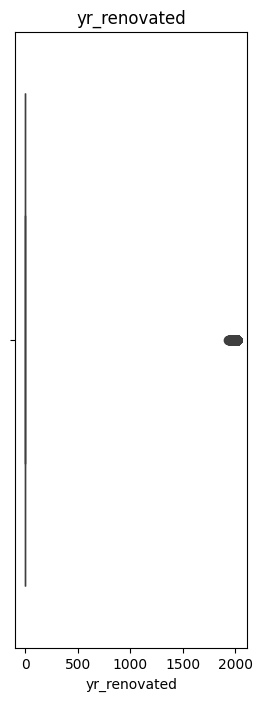

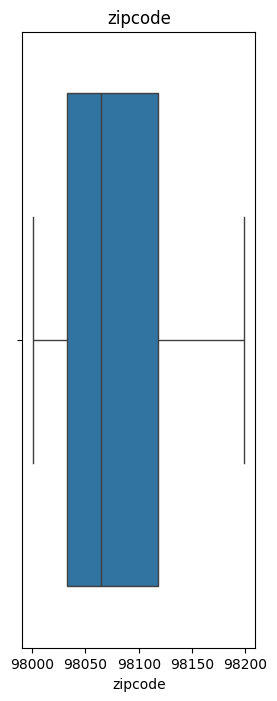

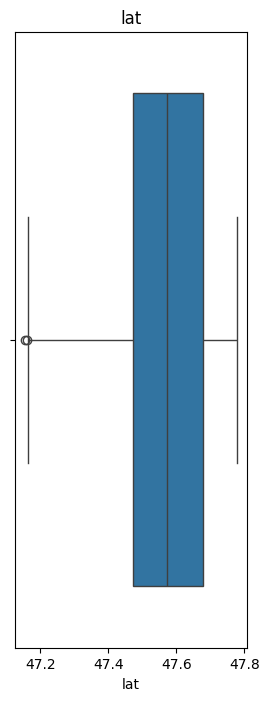

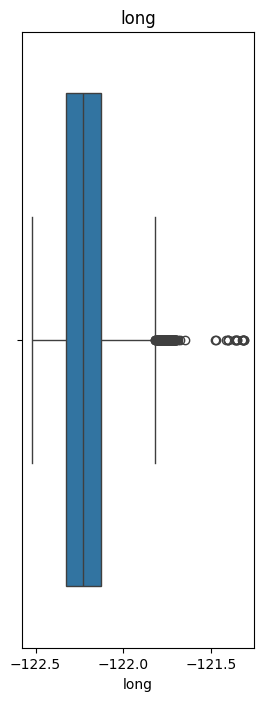

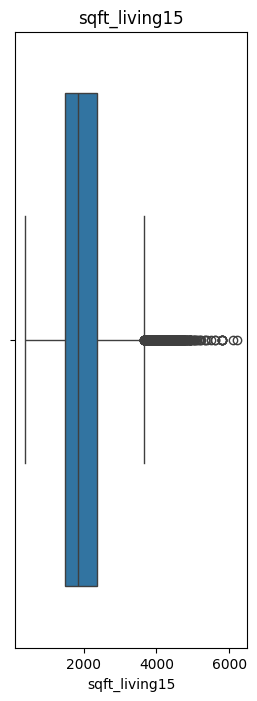

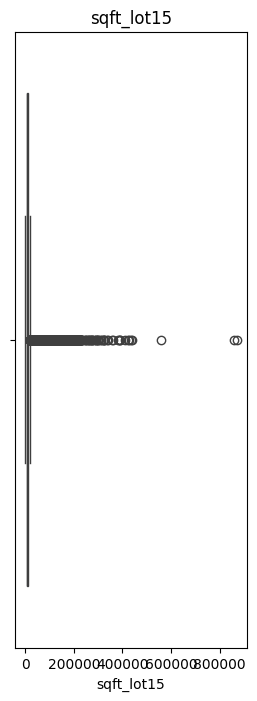

In [244]:
#Boxplots pour evaluer les outliers(valeurs aberrantes)
for col in dataset.columns:
  fig,ax=plt.subplots(figsize=(3,8))
  sns.boxplot(x=dataset[col],ax=ax)
  plt.title(col)
  plt.show()

***Visualisation des corrélations avec la variables cible***

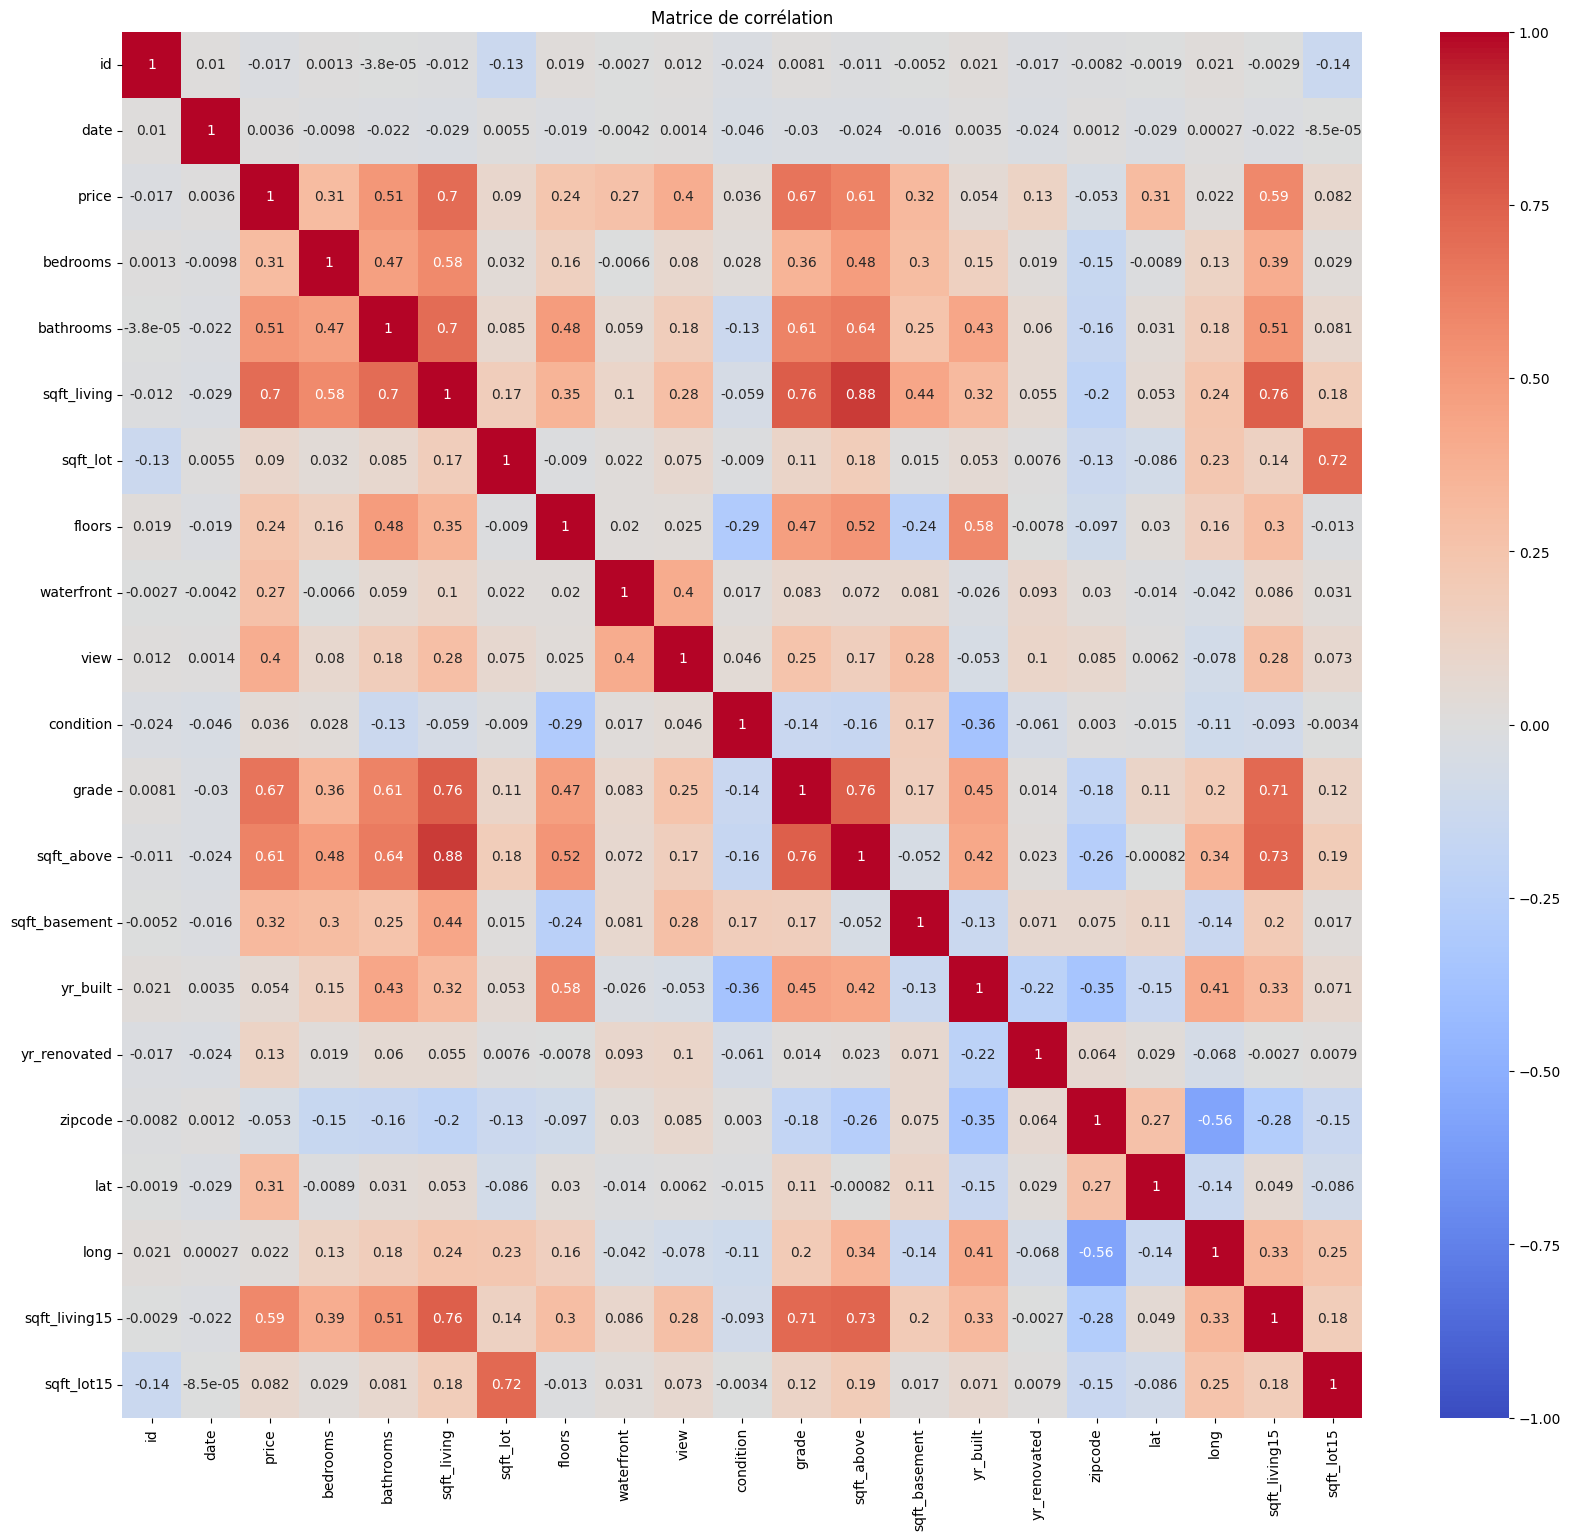

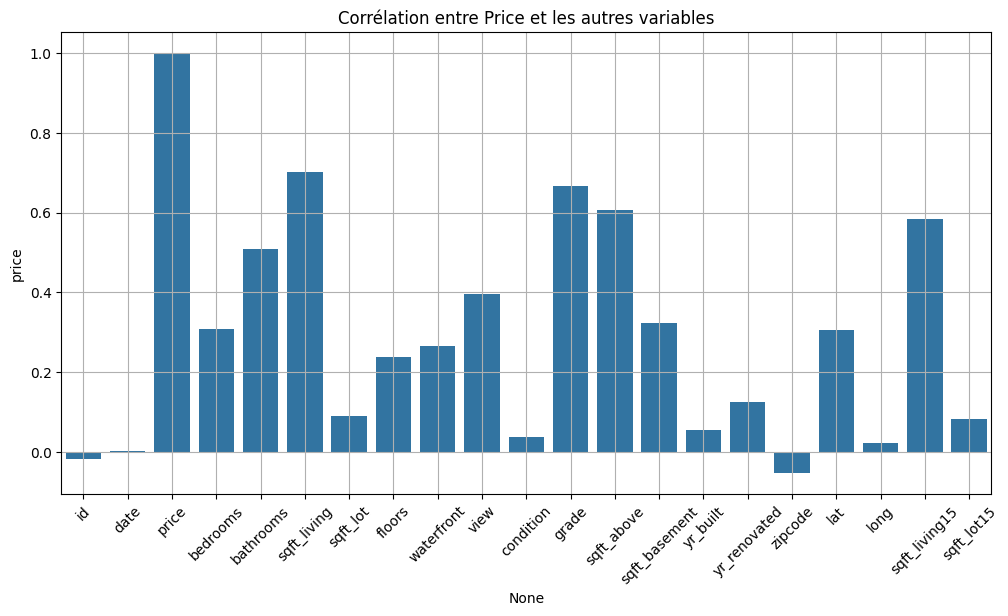

In [245]:
# Calculer la matrice de corrélation
correlation_matrix = dataset.corr()

# Visualisation avec heatmap (matrice de corrélation)
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de corrélation')
plt.show()

# Visualisation des corrélations les plus significatives avec price
plt.figure(figsize=(12, 6))
sns.barplot(x=correlation_matrix['price'].index, y=correlation_matrix['price'])
plt.title('Corrélation entre Price et les autres variables')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

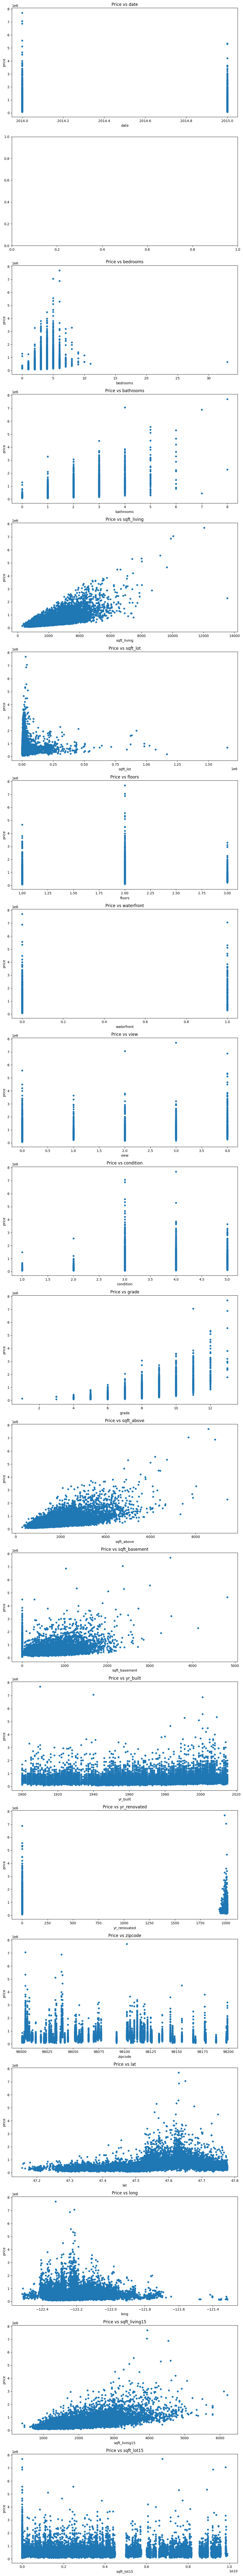

In [246]:
# Obtenir la liste des colonnes
columns = dataset.columns.tolist()

# Créer une figure avec des sous-graphiques
fig, axes = plt.subplots(nrows=len(columns)-1, ncols=1, figsize=(10, 5*len(columns)))

# Tracer 'price' en fonction de chaque autre colonne
for i, column in enumerate(columns):
    if column != 'price':
        dataset.plot(kind='scatter', x=column, y='price', ax=axes[i-1], title=f'Price vs {column}')

plt.tight_layout()
plt.show()

In [247]:
#Suppression de colonnes peu significatives pour la prédiction
dataset=dataset.drop(['id','date','long','condition','zipcode','yr_renovated','yr_built','sqft_lot','sqft_lot15'],axis=1)

In [248]:
dataset

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,221900.0,3,1,1180,1,0,0,7,1180,0,47.5112,1340
1,538000.0,3,2,2570,2,0,0,7,2170,400,47.7210,1690
2,180000.0,2,1,770,1,0,0,6,770,0,47.7379,2720
3,604000.0,4,3,1960,1,0,0,7,1050,910,47.5208,1360
4,510000.0,3,2,1680,1,0,0,8,1680,0,47.6168,1800
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2,1530,3,0,0,8,1530,0,47.6993,1530
21609,400000.0,4,2,2310,2,0,0,8,2310,0,47.5107,1830
21610,402101.0,2,0,1020,2,0,0,7,1020,0,47.5944,1020
21611,400000.0,3,2,1600,2,0,0,8,1600,0,47.5345,1410


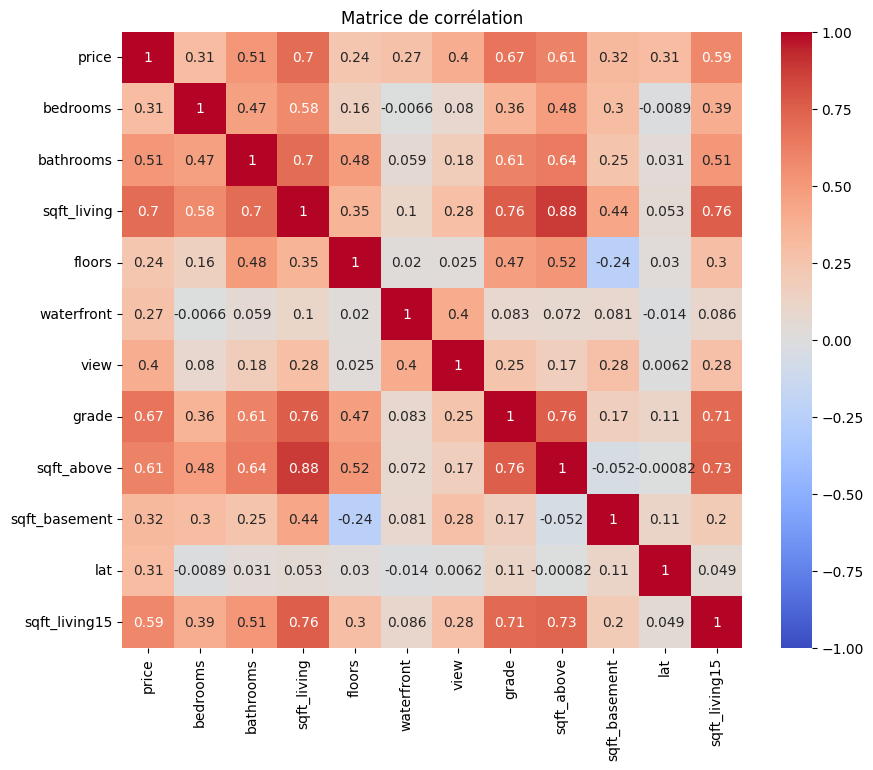

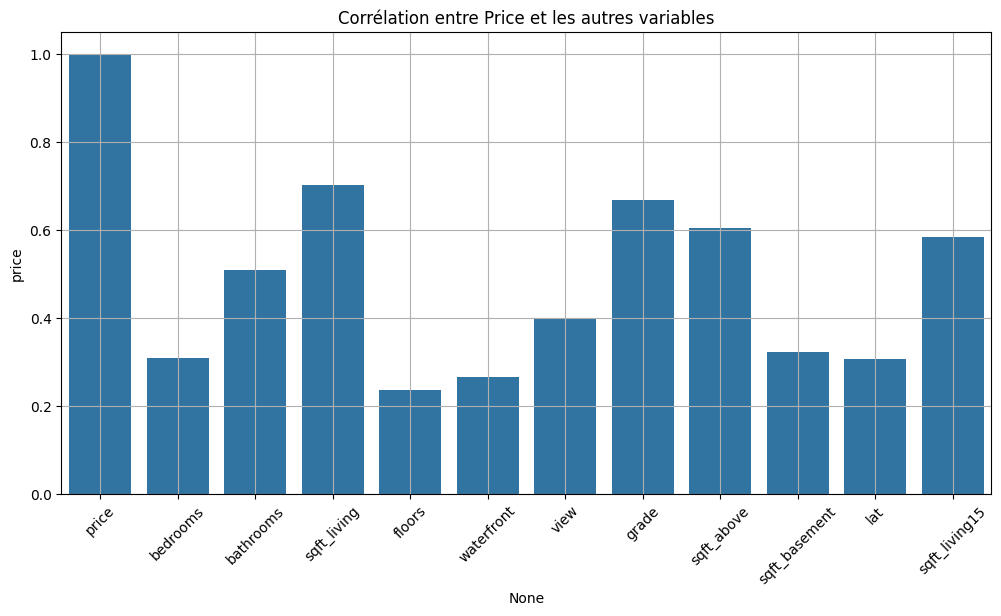

In [249]:
# Calculer la matrice de corrélation
correlation_matrix =dataset.corr()

# Visualisation avec heatmap (matrice de corrélation)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de corrélation')
plt.show()

# Visualisation des corrélations les plus significatives avec price
plt.figure(figsize=(12, 6))
sns.barplot(x=correlation_matrix['price'].index, y=correlation_matrix['price'])
plt.title('Corrélation entre Price et les autres variables')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


***Division de la base de données en train et en test***

In [250]:
#Separation de la données en train et test
train,test = train_test_split(dataset,test_size=0.2, random_state=42)

In [251]:
train.describe()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
count,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,5.377680e+05,3.368132,1.748120,2073.894910,1.451243,0.007172,0.233025,7.653846,1785.962175,287.932736,47.560330,1982.904569
std,3.614639e+05,0.931385,0.730743,907.297963,0.555102,0.084385,0.761749,1.170355,821.626290,438.727110,0.138432,681.232425
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,0.000000,0.000000,1.000000,290.000000,0.000000,47.159300,399.000000
25%,3.201500e+05,3.000000,1.000000,1430.000000,1.000000,0.000000,0.000000,7.000000,1200.000000,0.000000,47.472000,1480.000000
50%,4.500000e+05,3.000000,2.000000,1910.000000,1.000000,0.000000,0.000000,7.000000,1560.000000,0.000000,47.571800,1840.000000
75%,6.400000e+05,4.000000,2.000000,2540.000000,2.000000,0.000000,0.000000,8.000000,2200.000000,550.000000,47.678000,2360.000000
max,7.700000e+06,33.000000,8.000000,12050.000000,3.000000,1.000000,4.000000,13.000000,8860.000000,4820.000000,47.777600,6210.000000


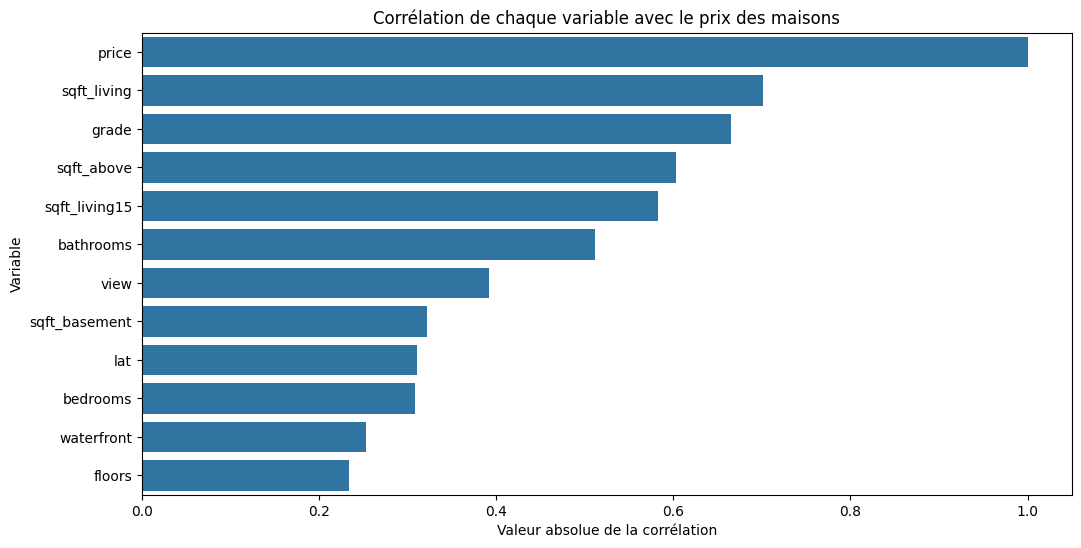

In [252]:
# Calcul de la corrélation entre chaque variable et la variable cible (en valeur absolue)
correlations = abs(train.corr()["price"]).sort_values(ascending=False)

# Représentation graphique des corrélations
plt.figure(figsize=(12, 6))
sns.barplot(x=correlations.values, y=correlations.index)
plt.xlabel("Valeur absolue de la corrélation")
plt.ylabel("Variable")
plt.title("Corrélation de chaque variable avec le prix des maisons")
plt.show()

In [253]:
train

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
6325,325000.0,3,1,1780,1,0,0,9,1780,0,47.3670,2750
13473,257000.0,2,1,1000,1,0,0,6,800,200,47.5520,1270
17614,228500.0,3,1,1080,1,0,0,6,990,90,47.4838,1170
16970,288000.0,3,2,2090,1,0,0,7,1280,810,47.3951,1800
20868,479000.0,2,2,1741,2,0,0,8,1446,295,47.7043,2090
...,...,...,...,...,...,...,...,...,...,...,...,...
11964,378000.0,3,1,1000,1,0,0,7,1000,0,47.7144,1000
21575,399950.0,3,2,3087,2,0,0,8,3087,0,47.2974,2927
5390,575000.0,3,2,2120,2,0,0,7,2120,0,47.6810,1690
860,245000.0,1,0,380,1,0,0,5,380,0,47.4810,1170


In [254]:
#Suppression de colonnes peu significatives
train=train.drop(['sqft_living15','sqft_above','sqft_basement'],axis=1)
test=test.drop(['sqft_living15','sqft_above','sqft_basement'],axis=1)

In [255]:
train

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,lat
6325,325000.0,3,1,1780,1,0,0,9,47.3670
13473,257000.0,2,1,1000,1,0,0,6,47.5520
17614,228500.0,3,1,1080,1,0,0,6,47.4838
16970,288000.0,3,2,2090,1,0,0,7,47.3951
20868,479000.0,2,2,1741,2,0,0,8,47.7043
...,...,...,...,...,...,...,...,...,...
11964,378000.0,3,1,1000,1,0,0,7,47.7144
21575,399950.0,3,2,3087,2,0,0,8,47.2974
5390,575000.0,3,2,2120,2,0,0,7,47.6810
860,245000.0,1,0,380,1,0,0,5,47.4810


In [256]:
test

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,lat
735,365000.0,4,2,2070,2,0,0,8,47.4388
2830,865000.0,5,3,2900,1,0,0,8,47.6784
4106,1038000.0,4,2,3770,2,0,2,11,47.5646
16218,1490000.0,3,3,4560,2,0,2,12,47.6995
19964,711000.0,3,2,2550,2,0,0,9,47.6647
...,...,...,...,...,...,...,...,...,...
13674,338000.0,3,1,1250,1,0,0,7,47.7623
20377,673000.0,3,2,2830,2,0,0,8,47.5606
8805,285000.0,4,2,2434,2,0,0,8,47.2874
10168,605000.0,4,1,2250,1,0,0,8,47.5922


***Séparation des données en test et entrainement/Conception et entrainement du modèle/Etude statistique du modèle***

In [257]:
# Sélectionner les colonnes à transformer et la variable cible
features = ['sqft_living','price']  # Remplacez par les noms de vos colonnes

# Appliquer la transformation logarithmique aux colonnes sélectionnées
for feature in features:
  if feature != 'price':
    train[feature] = np.log(train[feature] + 1) # Ajouter 1 pour éviter log(0)
    test[feature] = np.log(test[feature] + 1)
  else:
    train[feature] = np.log(train[feature])
    test[feature] = np.log(test[feature])

In [258]:
X_train=train.drop(['price'],axis=1)
X_test=test.drop(['price'],axis=1)

In [259]:
#Ajout de la constante de regression
X_train['constante']=1
X_test['constante']=1

In [260]:
X_train=X_train.values
X_test=X_test.values

In [261]:
y_train=train['price']
y_test=test['price']

In [262]:
#Création et entrainement du modèle
import statsmodels.api as sm
linereg = LinearRegression()
linereg = sm.OLS(y_train, X_train).fit()

In [263]:
#Coefficients du modèle/test statistique
results_table = linereg.summary2().tables[1]
results_table


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
x1,-0.012629,0.002954,-4.275262,1.919364e-05,-0.018419,-0.006839
x2,0.039508,0.004209,9.387306,6.902113e-21,0.031258,0.047757
x3,0.437079,0.009398,46.509276,0.000000e+00,0.418659,0.455499
x4,-0.048877,0.004528,-10.794778,4.445195e-27,-0.057752,-0.040002
x5,0.413281,0.026858,15.387514,4.464658e-53,0.360636,0.465926
x6,0.093993,0.003096,30.357864,2.893695e-197,0.087924,0.100062
x7,0.158397,0.002917,54.310383,0.000000e+00,0.152681,0.164114
x8,1.505813,0.015210,99.000424,0.000000e+00,1.475999,1.535626
const,-63.064037,0.725533,-86.920945,0.000000e+00,-64.486156,-61.641919


In [264]:
#metrics du modèle/test e fisher
linereg.summary2().tables[0]

,0,1,2,3
0,Model:,OLS,Adj. R-squared:,0.728
1,Dependent Variable:,price,AIC:,4295.8996
2,Date:,2024-07-18 15:11,BIC:,4365.7206
3,No. Observations:,17290,Log-Likelihood:,-2138.9
4,Df Model:,8,F-statistic:,5774.
5,Df Residuals:,17281,Prob (F-statistic):,0.00
6,R-squared:,0.728,Scale:,0.075025


In [265]:
y_pred = linereg.predict((X_test))

***Evaluation du modèle***

In [266]:


# Évaluer le modèle avec des métriques de régression
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 0.07592412052623103
Mean Absolute Error (MAE): 0.21277928216911807
R² Score: 0.7336295203902004


***Représentation de la capturation des données par le modèle***

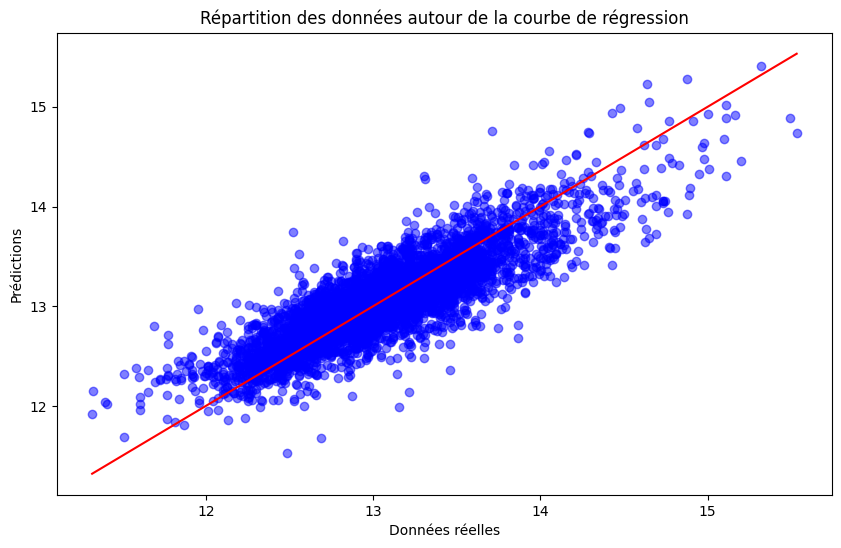

In [267]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-')
plt.xlabel('Données réelles')
plt.ylabel('Prédictions')
plt.title('Répartition des données autour de la courbe de régression')
plt.show()

***Test de prédiction avec le modèle conçu***

In [268]:
def pipeline(x):
    x = np.array(x)
    x = x.reshape(1,-1)
    y = linereg.predict(x)
    y = np.exp(y)
    return y

col = dataset.drop(['price','sqft_above','sqft_basement','sqft_living15'],axis=1)
Col = col.columns
features = ['sqft_living']
data = col.dtypes
data = data. values
data = data.tolist()
data = [a.str for a in data]
value = []
log = []
k=0
for i in Col:
    v = input("Entrez la valeur de "+i+" : ")
    d = data[k]
    if d[1] == 'i':
        v = int(v)
    elif d[1] == 'f':
        v = float(v)

    if i in features:
      v = np.log(v+1)
    value.append(v)
    k+=1
value.append(1)
p= pipeline(value)
print(f'\n\n la valeur de la maison est de : {p}')

Entrez la valeur de bedrooms : 2
Entrez la valeur de bathrooms : 1
Entrez la valeur de sqft_living : 2451
Entrez la valeur de floors : 1
Entrez la valeur de waterfront : 0
Entrez la valeur de view : 3
Entrez la valeur de grade : 4
Entrez la valeur de lat : 47


 la valeur de la maison est de : [162976.82658904]
